# Prediksi Kanker Payudara Jinak vs Ganas Berdasarkan Karakteristik Sel

## Data Understanding


### Sumber dataset

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

Wolberg, W. (1990). Breast Cancer Wisconsin (Original) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5HP4Z.

### Penjelasan Fitur dan Variabel

Dataset ini digunakan untuk memprediksi jenis kanker payudara, yaitu apakah jinak (benign) atau ganas (malignant), berdasarkan pengamatan morfologi sel dari sampel jaringan payudara. Data dikumpulkan melalui prosedur Fine Needle Aspiration (FNA), yaitu teknik pengambilan sampel dengan jarum halus yang umum digunakan dalam diagnosis kanker.

Setiap data merepresentasikan satu sampel jaringan yang dianalisis di bawah mikroskop. Proses penilaian dilakukan oleh ahli patologi berdasarkan karakteristik seluler yang terlihat secara visual. Nilai-nilai fitur diskalakan dalam rentang 1 hingga 10 untuk mencerminkan tingkat keparahan atau keabnormalan dari masing-masing karakteristik.

Dataset ini berasal dari hasil observasi medis yang dikumpulkan secara berkala oleh Dr. William H. Wolberg dari University of Wisconsin Hospitals, Madison.

Fitur-Fitur yang Digunakan:

1. Sample code number
   → Nomor identifikasi unik untuk setiap pasien atau sampel

2. Clump Thickness
   → Ketebalan kelompok sel. Clump yang lebih tebal sering mengindikasikan keganasan.

3. Uniformity of Cell Size
   → Keseragaman ukuran sel. Semakin tidak seragam, semakin tinggi kemungkinan kanker ganas.

4. Uniformity of Cell Shape
   → Keseragaman bentuk sel. Sel kanker sering kali berbentuk tidak teratur.

5. Marginal Adhesion
   → Kemampuan sel untuk saling menempel di tepi. Sel kanker biasanya kurang melekat.

6. Single Epithelial Cell Size
   → Ukuran sel epitel tunggal. Pembesaran sel ini bisa menjadi tanda keganasan.

7. Bare Nuclei
   → Inti sel yang terlihat jelas tanpa sitoplasma. Banyaknya inti yang tampak biasanya merupakan ciri kanker.

8. Bland Chromatin
   → Penampilan kromatin (materi genetik) dalam inti sel. Kromatin tidak merata adalah ciri keganasan.

9. Normal Nucleoli
   → Keberadaan nukleolus (struktur dalam inti sel). Nukleolus yang besar dan menonjol umum ditemukan pada sel kanker.

10. Mitoses
    → Jumlah sel yang sedang membelah. Mitosis tinggi mengindikasikan pertumbuhan sel yang cepat, ciri khas kanker.

11. Class (label)
    → Nilai target:

* `2` untuk jinak (benign)
* `4` untuk ganas (malignant)



### Eksplorasi data


#### Visualisasi data

In [33]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [34]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [35]:
import pandas as pd

# Gabungkan fitur dan target
df_breastcancer = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_breastcancer))
print("Visualisasi dataset breastcancer")
print(df_breastcancer.to_string(index=False))


Total baris dataset ini adalah = 699
Visualisasi dataset breastcancer
 Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  Class
               5                        1                         1                  1                            2          1.0                3                1        1      2
               5                        4                         4                  5                            7         10.0                3                2        1      2
               3                        1                         1                  1                            2          2.0                3                1        1      2
               6                        8                         8                  1                            3          4.0                3                7        1      2
               4                   

In [36]:
# Simpan ke file CSV
df_breastcancer.to_csv('datasetbreastcancer.csv', index=False)

## Preprocessing Data

### Transformasi data

Target yang sebelumnya berisi numerik diubah ke kategorikal, antara lain Jinak dan Ganas

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df_breastprep = pd.read_csv('datasetbreastcancer.csv')  # Ganti path jika perlu

# 2. Transformasi nilai pada kolom Class
df_breastprep['Class'] = df_breastprep['Class'].map({2: 'Jinak', 4: 'Ganas'})

print(df_breastprep.to_string(index=False))


 Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses Class
               5                        1                         1                  1                            2          1.0                3                1        1 Jinak
               5                        4                         4                  5                            7         10.0                3                2        1 Jinak
               3                        1                         1                  1                            2          2.0                3                1        1 Jinak
               6                        8                         8                  1                            3          4.0                3                7        1 Jinak
               4                        1                         1                  3                        

### Penanganan Missing Value

Pada Tahap ini, saya melakukan pengecekan missing value dari setiap kolom

In [38]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv('datasetbreastcancer.csv')

# 2. Cek jumlah missing value di setiap kolom
missing_per_column = df.isnull().sum()

# 3. Tampilkan hanya kolom yang memiliki missing value
missing_filtered = missing_per_column[missing_per_column > 0]

# 4. Tampilkan hasil
print("Missing Value per Kolom:")
print(missing_filtered)


Missing Value per Kolom:
Bare_nuclei    16
dtype: int64


Setelah missing value ditemukan, saya melakukan imputasi menggunakan median

In [39]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv('datasetbreastcancer.csv')

# 2. Cek jumlah missing value
missing_info = df.isnull().sum()
print("Missing Value Sebelum Imputasi:\n", missing_info[missing_info > 0])

# 3. Isi missing value dengan median
df_filled = df.copy()
numeric_cols = df_filled.select_dtypes(include=['int64', 'float64']).columns
df_filled[numeric_cols] = df_filled[numeric_cols].fillna(df_filled[numeric_cols].median())

# 4. Verifikasi bahwa tidak ada missing value lagi
missing_after = df_filled.isnull().sum()
print("\nMissing Value Setelah Imputasi:\n", missing_after[missing_after > 0])


print("Visualisasi data setelah penanganan missing value")
print(df_filled.to_string(index=False))

Missing Value Sebelum Imputasi:
 Bare_nuclei    16
dtype: int64

Missing Value Setelah Imputasi:
 Series([], dtype: int64)
Visualisasi data setelah penanganan missing value
 Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  Class
               5                        1                         1                  1                            2          1.0                3                1        1      2
               5                        4                         4                  5                            7         10.0                3                2        1      2
               3                        1                         1                  1                            2          2.0                3                1        1      2
               6                        8                         8                  1                         

### Pencarian Outlier

Pada tahap ini, saya melakukan pencarian outlier dari setiap kolom

In [40]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# 1. Load data
df = pd.read_csv('datasetbreastcancer.csv')

# 2. Pilih kolom numerik (kecuali 'Class')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Class', errors='ignore')

# 3. Imputasi nilai NaN dengan median
df_filled = df.copy()
df_filled[numeric_cols] = df_filled[numeric_cols].fillna(df_filled[numeric_cols].median())

# 4. Terapkan LOF
X = df_filled[numeric_cols]
lof = LocalOutlierFactor(n_neighbors=200, contamination=0.05)
y_pred = lof.fit_predict(X)
df_filled['LOF_Outlier'] = y_pred

# 5. Filter baris outlier
outlier_rows = df_filled[df_filled['LOF_Outlier'] == -1]

# 6. Identifikasi kolom mana saja yang nilai outlier-nya ekstrem (berdasarkan IQR)
outlier_info = {}
for col in numeric_cols:
    Q1 = df_filled[col].quantile(0.25)
    Q3 = df_filled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    count_outliers = ((outlier_rows[col] < lower) | (outlier_rows[col] > upper)).sum()
    if count_outliers > 0:
        outlier_info[col] = count_outliers

# 7. Tampilkan hasil terurut
outlier_info_sorted = dict(sorted(outlier_info.items(), key=lambda x: x[1], reverse=True))
print("Kolom dengan outlier terbanyak berdasarkan LOF:")
for col, count in outlier_info_sorted.items():
    print(f"{col}: {count} outlier")


Kolom dengan outlier terbanyak berdasarkan LOF:
Mitoses: 9 outlier
Single_epithelial_cell_size: 4 outlier
Marginal_adhesion: 3 outlier
Normal_nucleoli: 2 outlier


### Normalisasi data

Dataset dinormalisasi menggunakan StandarScaler dari library sklearn

In [41]:
from sklearn.preprocessing import StandardScaler

# Standarisasi hanya pada kolom yang akan digunakan (bisa semua atau sebagian)
cols_to_scale = ['Mitoses', 'Single_epithelial_cell_size', 'Marginal_adhesion', 'Normal_nucleoli', 'Bare_nuclei']

# Inisialisasi scaler
scaler = StandardScaler()

# Salin dataframe
df_scaled = df_filled.copy()

# Terapkan standarisasi
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])



### Split data

Dataset dipisahkan menjadi 2 yaitu data testing 20% dan data traning 80%

In [42]:
from sklearn.model_selection import train_test_split

# 1. Misahkan fitur (X) dan target (y)
X = df_scaled.drop(['Class', 'LOF_Outlier'], axis=1, errors='ignore')  # Fitur
y = df_scaled['Class']  # Target

# 2. Split menjadi data latih dan uji (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% untuk data uji
    random_state=42,     # Supaya hasil konsisten
    stratify=y           # Menjaga proporsi kelas seimbang
)

# 3. Cek jumlah data
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


Jumlah data latih: 559
Jumlah data uji: 140


#### Visualisasi data setelah preprocessing

Berikut adalah visualisasi data setelah tahap preprocessing

In [43]:
import pandas as pd

# Gabungkan fitur dan target
df_scaled = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_scaled))
print("Visualisasi dataset kanker payudara setelah target diubah menjadi kategorikal")
print(df_scaled)


Total baris dataset ini adalah = 699
Visualisasi dataset kanker payudara setelah target diubah menjadi kategorikal
     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8               

In [44]:
# Simpan ke file CSV
df_scaled.to_csv('datasetbreastcategorical.csv', index=False)

## Modelling

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

### Modelling Klasifikasi Kanker Payudara menggunakan Decision Tree

Pemodelan ini bertujuan untuk memprediksi jenis kanker payudara (jinak atau ganas) berdasarkan sejumlah fitur klinis dari hasil pemeriksaan seperti ukuran sel epitel, adhesi antar sel, ukuran nukleoli, jumlah mitosis, dan atribut lainnya yang diperoleh dari data biopsi.

Kelas target yang digunakan dalam model ini terdiri dari dua kategori:

* Jinak
* Ganas

Model klasifikasi yang digunakan adalah Decision Tree Classifier, salah satu metode *supervised learning* berbasis struktur pohon bercabang. Setiap cabang merepresentasikan keputusan berdasarkan nilai fitur, dan setiap daun pada pohon menunjukkan hasil klasifikasi akhir.

1. Pembagian Dataset: Data Latih dan Data Uji

Langkah pertama dalam pemodelan adalah membagi dataset menjadi:

* Data Latih (Training Set): digunakan untuk melatih model.
* Data Uji (Testing Set): digunakan untuk mengevaluasi performa model terhadap data yang belum pernah dilihat.

Untuk eksperimen ini digunakan rasio 80% data latih dan 20% data uji, yang merupakan praktik umum dalam pembelajaran mesin. Rasio ini bisa disesuaikan berdasarkan ukuran dan distribusi data.

2. Pra-Pemrosesan Data

Sebelum data digunakan dalam pelatihan model Decision Tree, dilakukan beberapa tahapan pra-pemrosesan sebagai berikut:

* Penanganan Missing Value: nilai kosong pada fitur numerik diisi menggunakan nilai median, karena lebih tahan terhadap outlier.
* Transformasi Label: kolom target `Class` yang sebelumnya berupa angka `2` dan `4` dikonversi menjadi:

  * `2` → Jinak
  * `4` → Ganas
* Standarisasi Data: beberapa fitur numerik dinormalisasi menggunakan StandardScaler, untuk menjaga konsistensi skala antar fitur saat diperlukan (meskipun Decision Tree sebenarnya tidak sensitif terhadap skala).

3. Pelatihan Model Decision Tree

Model dilatih menggunakan algoritma Decision Tree, dengan konfigurasi sebagai berikut:

* Kriteria Pemisahan: `gini` (untuk mengukur impurity pada setiap split).
* Kedalaman Maksimal Pohon: `5` untuk menghindari overfitting pada data pelatihan.

Selama pelatihan, model secara otomatis memilih fitur yang paling berpengaruh untuk membagi data pada setiap node, dan membentuk struktur pohon keputusan secara hierarkis.

4. Evaluasi Model

Model yang telah dilatih dievaluasi menggunakan:

* Akurasi: persentase prediksi yang benar dari total data uji.
* Classification Report: menampilkan nilai precision, recall, dan F1-score untuk masing-masing kelas (jinak dan ganas).
* Confusion Matrix: memberikan gambaran persebaran prediksi model terhadap nilai sebenarnya, apakah sesuai atau terjadi kesalahan klasifikasi.

Selain itu, struktur pohon keputusan divisualisasikan untuk menunjukkan urutan pengambilan keputusan serta fitur-fitur yang paling berkontribusi terhadap klasifikasi.

5. Prediksi dan Interpretasi

Model yang telah dilatih dapat digunakan untuk:

* Memprediksi jenis kanker (jinak atau ganas) berdasarkan input dari fitur-fitur pasien.
* Mengidentifikasi fitur klinis yang paling menentukan dalam proses klasifikasi, seperti: `Mitoses`, `Single_epithelial_cell_size`, dan `Normal_nucleoli`.


Akurasi: 0.9214285714285714

=== Classification Report ===
              precision    recall  f1-score   support

           2       0.94      0.95      0.94        92
           4       0.89      0.88      0.88        48

    accuracy                           0.92       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.92      0.92      0.92       140



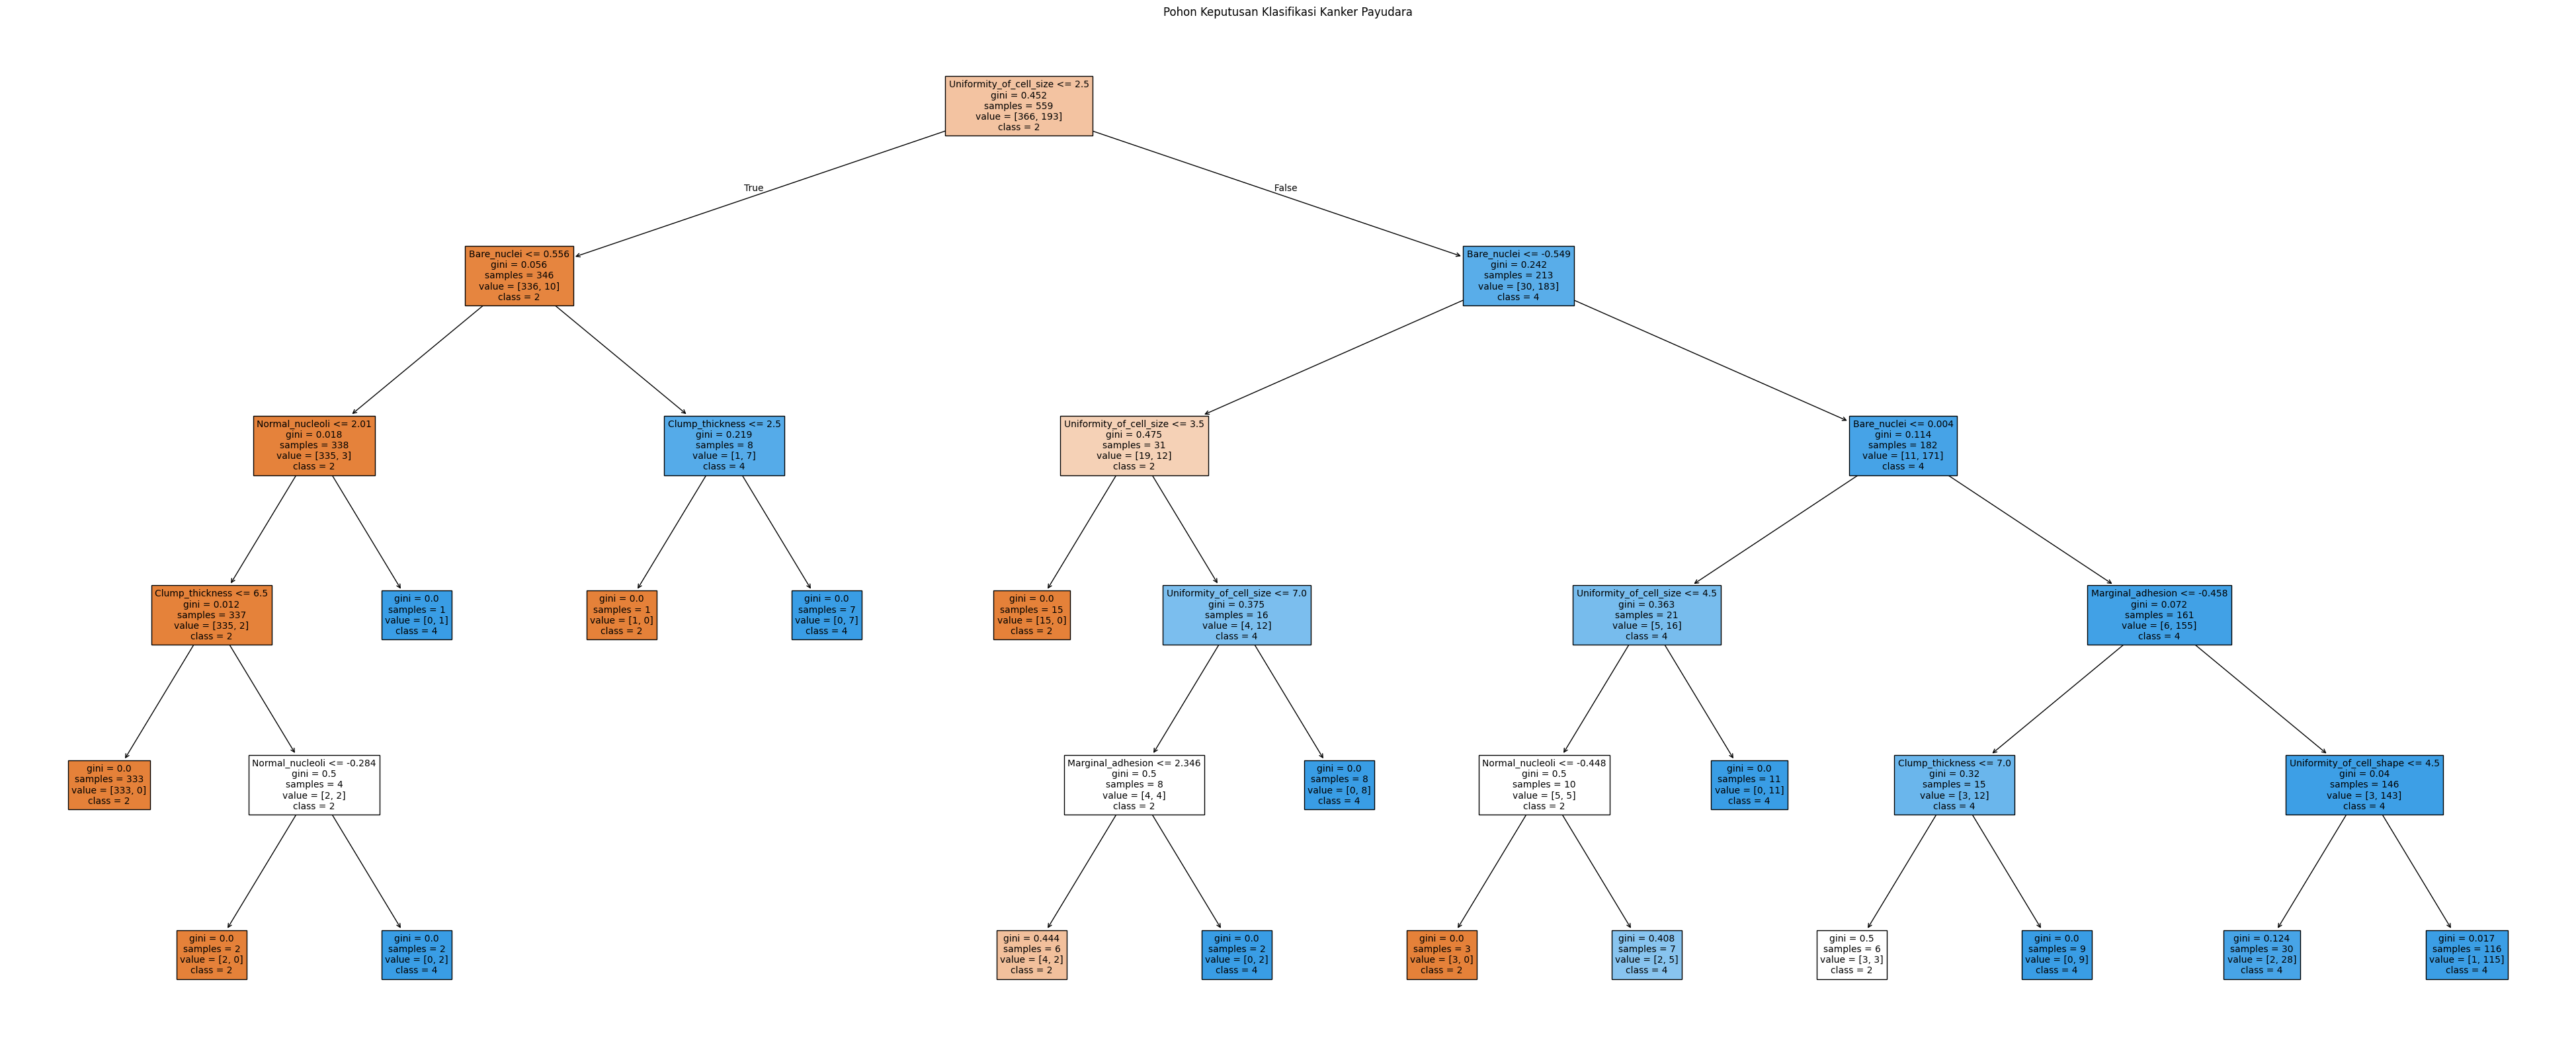

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 7. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 8. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Visualisasi Struktur Pohon ===
plt.figure(figsize=(50, 20))
plot_tree(clf, feature_names=X.columns, class_names=list(map(str, clf.classes_)), filled=True, fontsize=10)
plt.title("Pohon Keputusan Klasifikasi Kanker Payudara")
plt.show()


### Modelling Klasifikasi Kanker Payudara menggunakan Gaussian Naive Bayes

Pemodelan ini bertujuan untuk memprediksi jenis kanker payudara (jinak atau ganas) berdasarkan sejumlah fitur klinis dari hasil pemeriksaan pasien, seperti ukuran sel epitel, jumlah mitosis, ukuran nukleoli, adhesi sel, dan lain sebagainya.

Kategori target pada klasifikasi ini terdiri dari:

* Jinak
* Ganas

Model yang digunakan adalah Naive Bayes, yaitu algoritma klasifikasi berbasis probabilistik yang didasarkan pada Teorema Bayes dan mengasumsikan bahwa setiap fitur bersifat saling bebas (*naive assumption*). Meskipun asumsi ini jarang benar dalam kenyataan, algoritma ini tetap memberikan performa yang baik dalam berbagai kasus klasifikasi, termasuk diagnosis medis.

1. Pembagian Dataset: Data Latih dan Data Uji

Langkah pertama dalam proses pemodelan adalah membagi dataset menjadi dua bagian:

* Data Latih (Training Set): digunakan untuk melatih model.
* Data Uji (Testing Set): digunakan untuk menguji kemampuan model dalam memprediksi data yang belum pernah dilihat sebelumnya.

Untuk eksperimen ini digunakan rasio 80% data latih dan 20% data uji, yang merupakan praktik umum dalam pembelajaran mesin. Pemilihan rasio ini juga mempertimbangkan distribusi kelas agar tetap seimbang.

2. Pra-Pemrosesan Data

Sebelum data digunakan untuk pelatihan model Naive Bayes, dilakukan beberapa tahap pra-pemrosesan, antara lain:

* Penanganan Missing Value: setiap nilai kosong diisi dengan nilai median dari masing-masing kolom, karena median tidak terpengaruh oleh outlier.
* Transformasi Label Target: nilai pada kolom `Class` yang sebelumnya berupa angka `2` dan `4` dikonversi menjadi:

  * `2` → Jinak
  * `4` → Ganas
* Standarisasi Data (opsional): meskipun Naive Bayes (khususnya GaussianNB) tidak terlalu terpengaruh oleh skala data, standarisasi dapat membantu stabilitas perhitungan probabilitas.

3. Pelatihan Model Naive Bayes

Model dilatih menggunakan algoritma Gaussian Naive Bayes (GaussianNB), yang mengasumsikan bahwa data numerik mengikuti distribusi normal (Gaussian). Setiap fitur dihitung nilai rata-rata dan variansinya untuk masing-masing kelas, kemudian digunakan untuk menghitung probabilitas posterior.

4. Evaluasi Model

Setelah model dilatih, kinerjanya dievaluasi menggunakan:

* Akurasi: persentase prediksi yang sesuai dengan nilai aktual pada data uji.
* Classification Report: menampilkan nilai precision, recall, dan F1-score untuk masing-masing kelas (jinak dan ganas).
* Confusion Matrix: menggambarkan distribusi prediksi model terhadap data aktual, apakah model banyak melakukan kesalahan pada salah satu kelas atau tidak.

Evaluasi ini sangat penting, terutama pada kasus medis, untuk memastikan model tidak bias pada salah satu kelas (misalnya hanya memprediksi "jinak" terus-menerus).

5. Prediksi dan Interpretasi

Model yang telah terlatih dapat digunakan untuk:

* Memprediksi status kanker pasien baru berdasarkan hasil fitur klinis.
* Menilai seberapa besar probabilitas suatu data termasuk dalam kategori "jinak" atau "ganas".
* Memberikan insight cepat dan ringan untuk diagnosis awal tanpa memerlukan perhitungan kompleks.


Akurasi: 0.9571428571428572

=== Classification Report ===
              precision    recall  f1-score   support

           2       0.98      0.96      0.97        92
           4       0.92      0.96      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



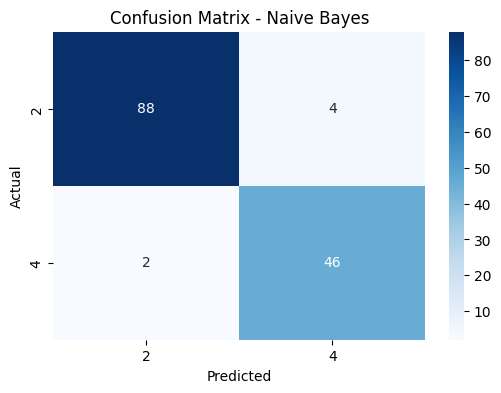

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Latih model Naive Bayes ===
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# === 8. Evaluasi hasil prediksi ===
y_pred = gnb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=gnb.classes_, yticklabels=gnb.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


### Modelling Klasifikasi Kanker Payudara menggunakan K-Nearest Neighbor (K-NN)

Pemodelan ini bertujuan untuk memprediksi jenis kanker payudara (jinak atau ganas) berdasarkan sejumlah fitur klinis yang diperoleh dari hasil pemeriksaan, seperti ukuran sel epitel, adhesi sel, nukleoli normal, mitosis, dan lain-lain.

Kelas target pada klasifikasi ini terdiri dari dua kategori utama:

* Jinak
* Ganas

Metode yang digunakan adalah K-Nearest Neighbors (KNN), yaitu algoritma berbasis instance-based learning yang mengklasifikasikan data baru berdasarkan mayoritas kelas dari K tetangga terdekat di ruang fitur. Algoritma ini tidak memiliki proses pelatihan eksplisit seperti model statistik, melainkan menyimpan seluruh data latih dan melakukan perhitungan jarak saat prediksi.

1. Pembagian Dataset: Data Latih dan Data Uji

Dataset dibagi menjadi dua bagian utama:

* Data Latih (Training Set): digunakan untuk menyimpan data yang menjadi referensi dalam menentukan tetangga terdekat.
* Data Uji (Testing Set): digunakan untuk menguji akurasi prediksi model terhadap data yang belum pernah dilihat sebelumnya.

Pada eksperimen ini digunakan rasio 80% data latih dan 20% data uji, yang merupakan praktik umum untuk menjaga keseimbangan antara pelatihan dan evaluasi.

2. Pra-Pemrosesan Data

Sebelum digunakan dalam model KNN, dataset melalui beberapa tahapan pra-pemrosesan penting, yaitu:

* Penanganan Missing Value: semua nilai kosong diisi dengan nilai median kolom masing-masing untuk menghindari bias akibat outlier.
* Transformasi Label Target: nilai `2` pada kolom `Class` diubah menjadi `'Jinak'`, dan nilai `4` menjadi `'Ganas'` agar lebih deskriptif.
* Standarisasi Data: KNN sangat sensitif terhadap skala data, karena perhitungan jaraknya bergantung pada fitur numerik. Oleh karena itu, semua fitur numerik distandarisasi menggunakan StandardScaler agar memiliki rata-rata 0 dan deviasi standar 1.

3. Pelatihan Model KNN

Model KNN tidak membutuhkan proses pelatihan dalam arti tradisional, tetapi menyimpan data latih. Ketika ada data baru yang akan diprediksi, algoritma akan:

* Menghitung jarak (biasanya Euclidean) dari data baru ke seluruh data latih.
* Menentukan K data terdekat (misalnya `K=5`).
* Mengklasifikasikan data baru berdasarkan mayoritas kelas dari tetangga-tetangga tersebut.

Pemilihan nilai K yang optimal sangat penting, karena:

* Nilai K terlalu kecil → model sangat sensitif terhadap noise (overfitting).
* Nilai K terlalu besar → model bisa menjadi terlalu general dan kurang peka (underfitting).

4. Evaluasi Model

Model dievaluasi menggunakan:

* Akurasi: jumlah prediksi yang benar dibandingkan total data uji.
* Classification Report: metrik seperti precision, recall, dan F1-score untuk mengevaluasi performa pada masing-masing kelas.
* Confusion Matrix: tabel yang menunjukkan seberapa banyak data dari masing-masing kelas diklasifikasikan dengan benar atau salah.

Visualisasi confusion matrix menggunakan heatmap membantu untuk melihat seberapa besar kesalahan prediksi terjadi pada masing-masing kelas.

5. Prediksi dan Implementasi

Setelah model disiapkan dan dievaluasi, model KNN dapat digunakan untuk:

* Memprediksi jenis kanker payudara pasien baru berdasarkan fitur klinis.
* Memberikan klasifikasi berbasis kesamaan dengan data yang pernah dikumpulkan sebelumnya.
* Menjadi sistem pendukung keputusan yang sederhana namun cukup akurat jika fitur sudah terstandarisasi dengan baik.

Akurasi: 0.9571428571428572

=== Classification Report ===
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        92
           4       0.94      0.94      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



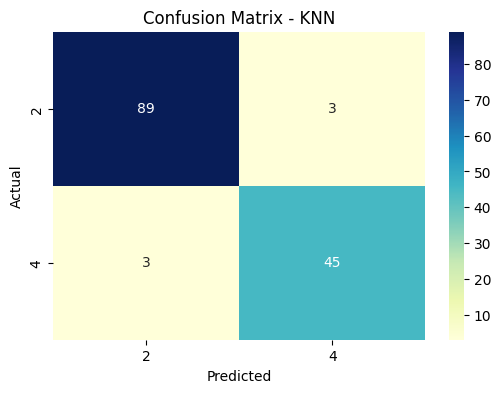

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Latih model KNN ===
knn = KNeighborsClassifier(n_neighbors=5)  # kamu bisa ubah k sesuai kebutuhan
knn.fit(X_train, y_train)

# === 8. Evaluasi ===
y_pred = knn.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=knn.classes_, yticklabels=knn.classes_, cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


## Evaluasi Data

Dari dataset kanker payudara diatas, akurasi yang didapatkan dari ketiga model klasifikasi antara lain:

* Decision Tree = 93,57%
* Gaussian Naive Bayes = 95,71%
* K-Nearest Neighbor = 96,43%

Dari ketiga model diatas dapat disimpulkan bahwa KNN memiliki akurasi tertinggi yaitu 96,43%.

## Deployment

Dari ketiga model, model terbaik adalah KNN, yang memiliki akurasi tertinggi yaitu 96,43%.

### Menyimpan model

In [48]:
import joblib

# === Simpan model ke file .pkl menggunakan joblib ===
joblib.dump(knn, 'model_knn.pkl')

print("Model KNN berhasil disimpan ke 'model_knn.pkl'")


Model KNN berhasil disimpan ke 'model_knn.pkl'


### Integrasi Model Dengan Web

* Install library Streamlit, dengan menjalankan perintah “pip install streamlit” pada terminal.
* membuat file berekstensi .py, misal prediksikankerpayudara.py.
* didalam prediksikankerpayudara.py saya panggil model yang telah disimpan.
* setelah itu saya membuat tampilan informasi keterangan tentang inputan dan hasil evaluasi. selain itu saya juga membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi. untuk tampilan saya masukkan code nya didalam file app.py juga, karena dimudahkan oleh library streamlit.

* Source code yang telah saya buat dapat diakses melalui link berikut :
https://github.com/Zuzun1ch/deploy

### Hasil Web